# **Modeling-1**

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns

import datetime

# Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.max_rows', None)

In [2]:
# 데이터 세트 로드
data = pd.read_csv('전체 데이터 통합.csv', encoding='cp949')

data

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
0,2018-01-01,서귀포시,남원읍,11030.2331,9791.3235,11498.2617,10650.5811,13324.2924,10954.4914,15372.8110,...,2199680,24828201,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,1239600
1,2018-01-01,서귀포시,대륜동,17647.5285,10160.5833,15216.9486,10298.1857,14152.0528,11361.8229,12541.6031,...,354993,37971731,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,1717700
2,2018-01-01,서귀포시,대정읍,12538.2881,7792.5662,14360.4369,6043.2109,16053.7231,8710.5446,19530.3550,...,2730942,37142481,6.1,0.0,58.4,1018.5,7.72,0.0,0.0,1264950
3,2018-01-01,서귀포시,대천동,10539.1926,7307.2766,10214.4234,7677.3523,7645.1222,8157.7877,7511.4389,...,687498,39231391,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,1765600
4,2018-01-01,서귀포시,동홍동,20141.3526,7741.1595,22060.7555,8331.2173,28043.7082,8607.6880,31639.5584,...,2572840,69274797,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,4165050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48416,2021-06-30,제주시,일도2동,48057.8395,18562.2277,30770.1050,10532.0118,41791.7039,14277.3294,40655.9314,...,13624338,52547555,24.9,0.0,75.1,1004.0,19.91,0.0,5.3,4963450
48417,2021-06-30,제주시,조천읍,30216.3887,14827.6615,21878.8003,9076.8035,21784.9016,11604.2870,24200.9821,...,20933190,28210604,24.9,0.0,75.1,1004.0,19.91,0.0,5.3,2175450
48418,2021-06-30,제주시,한경면,9193.6955,3548.3814,6477.0927,1736.8238,6839.1511,2765.9751,7319.9596,...,4176912,17679746,24.0,0.0,94.4,998.0,16.37,0.0,5.6,973850
48419,2021-06-30,제주시,한림읍,26110.8260,17203.7474,25456.5456,12150.2043,20592.9715,13470.3068,29606.2524,...,13545991,42071373,24.0,0.0,94.4,998.0,16.37,0.0,5.6,3298100


In [3]:
# 목표변수 설정
y_target = data['배출량']
X_data = data.drop(['base_date', 'city', 'emd_nm', '배출량'], axis=1)

## **Scaling**

In [4]:
scaler = MinMaxScaler()
columns = ['0여성notvisit', '0여성visit', '0남성notvisit', '0남성visit',
           '10여성notvisit', '10여성visit', '10남성notvisit', '10남성visit',
           '20여성notvisit', '20여성visit', '20남성notvisit', '20남성visit',
           '30여성notvisit', '30여성visit', '30남성notvisit', '30남성visit',
           '40여성notvisit', '40여성visit', '40남성notvisit', '40남성visit',
           '50여성notvisit', '50여성visit', '50남성notvisit', '50남성visit',
           '60여성notvisit', '60여성visit', '60남성notvisit', '60남성visit',
           '70여성notvisit', '70여성visit', '70남성notvisit', '70남성visit',
           '80여성notvisit', '80여성visit', '80남성notvisit', '80남성visit',
           '장기체류외국인', '단기체류외국인', 'dayoff',
           'use_amt배달', 'use_amt식품', 'use_amt농축수산물', 'use_amt마트/슈퍼마켓',
           '평균기온(°C)', '일강수량(mm)', '평균 상대습도(%)', '평균 현지기압(hPa)',
           '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '평균 전운량(1/10)']


X_data_sc = scaler.fit_transform(data[['0여성notvisit', '0여성visit', '0남성notvisit', '0남성visit',
                                     '10여성notvisit', '10여성visit', '10남성notvisit', '10남성visit',
                                     '20여성notvisit', '20여성visit', '20남성notvisit', '20남성visit',
                                     '30여성notvisit', '30여성visit', '30남성notvisit', '30남성visit',
                                     '40여성notvisit', '40여성visit', '40남성notvisit', '40남성visit',
                                     '50여성notvisit', '50여성visit', '50남성notvisit', '50남성visit',
                                     '60여성notvisit', '60여성visit', '60남성notvisit', '60남성visit',
                                     '70여성notvisit', '70여성visit', '70남성notvisit', '70남성visit',
                                     '80여성notvisit', '80여성visit', '80남성notvisit', '80남성visit',
                                     '장기체류외국인', '단기체류외국인', 'dayoff',
                                     'use_amt배달', 'use_amt식품', 'use_amt농축수산물', 'use_amt마트/슈퍼마켓',
                                     '평균기온(°C)', '일강수량(mm)', '평균 상대습도(%)', '평균 현지기압(hPa)',
                                     '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '평균 전운량(1/10)']])

X_data_sc = pd.DataFrame(X_data_sc, columns=columns)

X_data_sc

,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,10남성visit,20여성notvisit,20여성visit,...,use_amt식품,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10)
0,0.065516,0.115725,0.126993,0.198368,0.107253,0.117499,0.117702,0.199937,0.075269,0.200671,...,0.100580,0.014345,0.073566,0.256410,0.0,0.589,0.987323,0.000000,0.0,0.00
1,0.105439,0.120140,0.168961,0.191650,0.114005,0.121903,0.095484,0.192975,0.105838,0.198808,...,0.019501,0.002315,0.114538,0.256410,0.0,0.589,0.987323,0.000000,0.0,0.00
2,0.074614,0.091823,0.159295,0.110538,0.129517,0.093235,0.150328,0.111155,0.094003,0.111552,...,0.008672,0.017810,0.111953,0.256410,0.0,0.584,0.985582,0.258540,0.0,0.00
3,0.062554,0.086019,0.112504,0.141690,0.060928,0.087258,0.056010,0.143083,0.057031,0.120866,...,0.016026,0.004484,0.118465,0.256410,0.0,0.589,0.987323,0.000000,0.0,0.00
4,0.120484,0.091208,0.246199,0.154154,0.227321,0.092123,0.245355,0.154652,0.121410,0.125522,...,0.018373,0.016779,0.212117,0.256410,0.0,0.589,0.987323,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48416,0.288906,0.220611,0.344491,0.196108,0.339464,0.153429,0.316111,0.193486,0.324488,0.192247,...,0.303845,0.088852,0.159974,0.792023,0.0,0.751,0.971550,0.666778,0.0,0.53
48417,0.181267,0.175951,0.244145,0.168367,0.176267,0.124525,0.186981,0.169035,0.177253,0.386165,...,0.171786,0.136517,0.084110,0.792023,0.0,0.751,0.971550,0.666778,0.0,0.53
48418,0.054436,0.041069,0.070326,0.028446,0.054353,0.028956,0.054508,0.028472,0.030607,0.114813,...,0.046194,0.027240,0.051283,0.766382,0.0,0.944,0.965744,0.548225,0.0,0.56
48419,0.156498,0.204366,0.284523,0.226955,0.166544,0.144702,0.229399,0.225488,0.155013,0.470428,...,0.160942,0.088341,0.127317,0.766382,0.0,0.944,0.965744,0.548225,0.0,0.56


In [5]:
# Train-Test Set 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=42)
X_train_sc, X_test_sc, y_train, y_test = train_test_split(X_data_sc, y_target, test_size=0.2, random_state=42)

## **Grid Search CV**

In [6]:
# Models
lgbm_reg = LGBMRegressor(random_state=42, n_jobs=-1)
rf_reg = RandomForestRegressor(random_state=42, n_jobs=-1)
gb_reg = GradientBoostingRegressor(random_state=42)
xgb_reg = XGBRegressor(random_state=42, n_jobs=-1)

### **1. Light GBM Regressor**

In [7]:
params = {
    'n_estimators': [5, 10, 100],
    'max_depth': [-1, 3, 7, 10, 20],
    'min_child_samples': [10, 20]
}

grid_cv = GridSearchCV(lgbm_reg, param_grid=params, cv=5, verbose=1)
grid_cv.fit(X_data, y_target)
print('GridSearchCV 최고 평균 정확도 수치 : {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라마터   :', grid_cv.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
GridSearchCV 최고 평균 정확도 수치 : 0.9322
GridSearchCV 최적 하이퍼파라마터   : {'max_depth': 10, 'min_child_samples': 20, 'n_estimators': 100}


### **2. Random Forest Regressor**

In [8]:
params = {
    'n_estimators': [5, 10, 100],
    'max_depth': [1, 3, 7, 10, 20]
}

grid_cv = GridSearchCV(rf_reg, param_grid=params, cv=5, verbose=1)
grid_cv.fit(X_data, y_target)
print('GridSearchCV 최고 평균 정확도 수치 : {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라마터   :', grid_cv.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
GridSearchCV 최고 평균 정확도 수치 : 0.9351
GridSearchCV 최적 하이퍼파라마터   : {'max_depth': 20, 'n_estimators': 100}


### **3. Gradient Boosting Regressor**

In [9]:
params = {
    'n_estimators': [5, 10, 100],
    'max_depth': [1, 3, 7, 10, 20]
}

grid_cv = GridSearchCV(gb_reg, param_grid=params, cv=5, verbose=1)
grid_cv.fit(X_data, y_target)
print('GridSearchCV 최고 평균 정확도 수치 : {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라마터   :', grid_cv.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
GridSearchCV 최고 평균 정확도 수치 : 0.9358
GridSearchCV 최적 하이퍼파라마터   : {'max_depth': 7, 'n_estimators': 100}


### **4. XGBoost Regressor**

In [10]:
params = {
    'n_estimators': [5, 10, 100],
    'max_depth': [1, 3, 7, 10, 20]
}

grid_cv = GridSearchCV(xgb_reg, param_grid=params, cv=5, verbose=1)
grid_cv.fit(X_data, y_target)
print('GridSearchCV 최고 평균 정확도 수치 : {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라마터   :', grid_cv.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
GridSearchCV 최고 평균 정확도 수치 : 0.9316
GridSearchCV 최적 하이퍼파라마터   : {'max_depth': 7, 'n_estimators': 100}


## **다양한 Regressor 모델 비교**

In [11]:
# GridSearchCV 결과 적용
lgbm_reg = LGBMRegressor(random_state=42, n_jobs=-1,
                         max_depth=10, min_child_samples=20, n_estimators=100,
                         importance_type='gain')
rf_reg = RandomForestRegressor(random_state=42, n_jobs=-1,
                               max_depth=20, n_estimators=100)
gb_reg = GradientBoostingRegressor(random_state=42,
                                   max_depth=7, n_estimators=100)
xgb_reg = XGBRegressor(random_state=42, n_jobs=-1,
                       max_depth=7, n_estimators=100)

In [12]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_mse = -1 * np.mean(neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print('#####', model.__class__.__name__, '#####')
    print('5 교차 검증의 평균 MSE  : {0:.3f}'.format(avg_mse))
    print('5 교차 검증의 평균 RMSE : {0:.3f}\n'.format(avg_rmse))

In [13]:
# 모델마다 반복하면서 평가 수행
models = [lgbm_reg, rf_reg, gb_reg, xgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)
    
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    print('MAE  : {:.3f}'.format(mean_absolute_error(y_test, y_preds)))
    print('MSE  : {:.3f}'.format(mean_squared_error(y_test, y_preds)))
    print('RMSE : {:.3f}\n'.format(np.sqrt(mean_squared_error(y_test, y_preds))))

##### LGBMRegressor #####
5 교차 검증의 평균 MSE  : 259757738179.318
5 교차 검증의 평균 RMSE : 508464.077

MAE  : 236760.239
MSE  : 127009466345.065
RMSE : 356383.875

##### RandomForestRegressor #####
5 교차 검증의 평균 MSE  : 251408325328.213
5 교차 검증의 평균 RMSE : 500398.385

MAE  : 206909.527
MSE  : 123093214362.115
RMSE : 350846.426

##### GradientBoostingRegressor #####
5 교차 검증의 평균 MSE  : 248555542388.876
5 교차 검증의 평균 RMSE : 497677.014

MAE  : 218656.194
MSE  : 117044099266.345
RMSE : 342117.084

##### XGBRegressor #####
5 교차 검증의 평균 MSE  : 263848629564.576
5 교차 검증의 평균 RMSE : 512811.017

MAE  : 211254.742
MSE  : 112531839985.459
RMSE : 335457.658



## **Feature Importance**

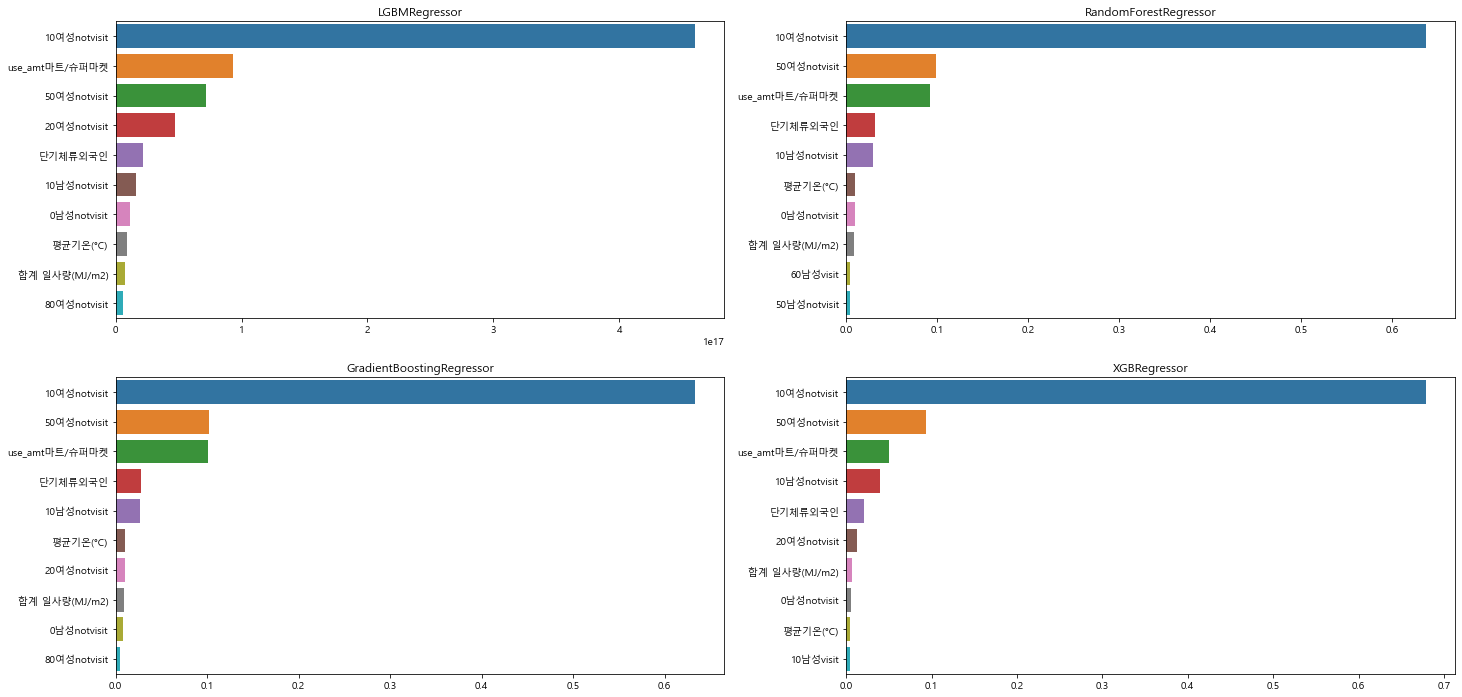

In [14]:
plt.figure(figsize=(24, 12))
for model in range(len(models)):
    
    plt.subplot(2, 2, model+1)
    feature_series = pd.Series(data=models[model].feature_importances_, index=X_data.columns)
    feature_series = feature_series.sort_values(ascending=False)
    sns.barplot(x=feature_series[:10], y=feature_series[:10].index)
    plt.title('{}'.format(models[model].__class__.__name__))

plt.show()